# Predicting the Severity of Road Traffic Accidents - Part 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
df = pd.read_csv("dataset.csv")
#Checking the data types of the columns
df.dtypes

,0
status,object
accident_index,object
accident_year,int64
accident_reference,object
vehicle_reference,int64
casualty_reference,int64
casualty_class,int64
sex_of_casualty,int64
age_of_casualty,int64
age_band_of_casualty,int64


In [3]:
df1=df.copy()
df1

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61347,Unvalidated,2022461156711,2022,461156711,1,1,3,2,56,9,3,10,9,0,0,0,0,1,10,E01024046
61348,Unvalidated,2022461157243,2022,461157243,1,1,3,1,14,3,2,5,9,0,0,0,0,-1,-1,-1
61349,Unvalidated,2022461157256,2022,461157256,2,1,1,1,42,7,3,0,0,0,0,0,9,1,5,E01016034
61350,Unvalidated,2022461157316,2022,461157316,1,1,1,2,40,7,3,0,0,0,0,0,9,1,3,E01024497


# Data Modeling

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [5]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Machine Learning Model Training and Evaluation

Random Forest Model Performance:
Accuracy: 0.77
Precision: 0.71
Recall: 0.77
F1 Score: 0.73
------------------------------
Logistic Regression Model Performance:
Accuracy: 0.80
Precision: 0.69
Recall: 0.80
F1 Score: 0.71
------------------------------
K-Nearest Neighbors Model Performance:
Accuracy: 0.77
Precision: 0.70
Recall: 0.77
F1 Score: 0.72
------------------------------
Gradient Boosting Model Performance:
Accuracy: 0.80
Precision: 0.73
Recall: 0.80
F1 Score: 0.73
------------------------------


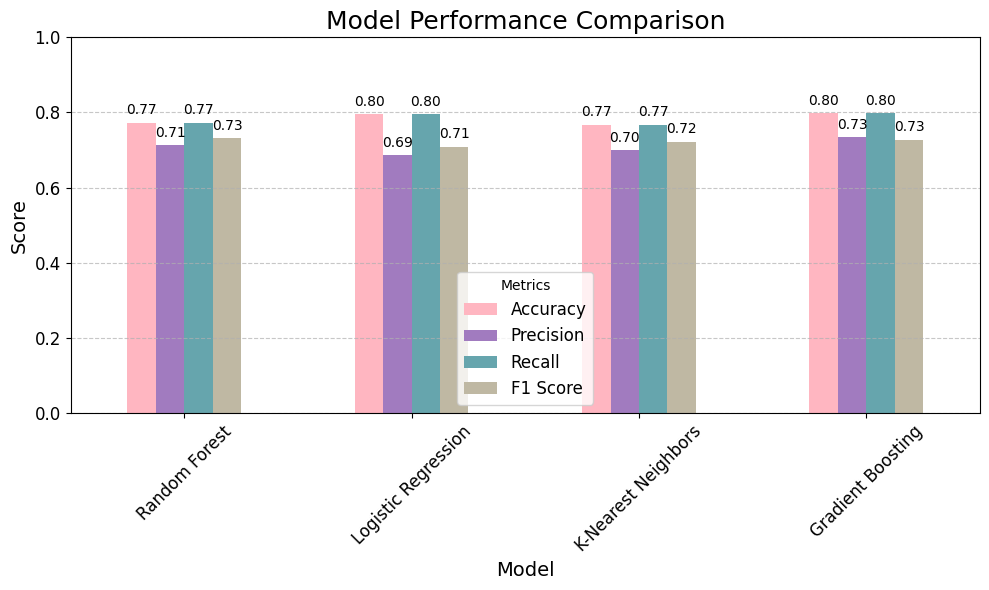

In [6]:
# Machine Learning Model Training and Evaluation

# Assuming 'df' is your DataFrame and 'casualty_severity' is the target variable
X = df.drop(['status', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'casualty_reference', 'casualty_severity'], axis=1)  # Features
y = df['casualty_severity']  # Target variable

# Encode categorical features
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Dictionary to store evaluation metrics
performance = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train, predict, and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"{name} Model Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("-" * 30)

    # Append metrics to the performance dictionary
    performance['Model'].append(name)
    performance['Accuracy'].append(accuracy)
    performance['Precision'].append(precision)
    performance['Recall'].append(recall)
    performance['F1 Score'].append(f1)

# Convert the performance dictionary to a DataFrame
performance_df = pd.DataFrame(performance)

# Plotting the performance metrics for each model with improvements
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric with distinct, high-contrast colors
performance_df.set_index('Model').plot(kind='bar', ax=ax, color=['#ffb6C1', '#a17bbf', '#66a5ad', '#bfb8a3'])

# Set plot labels and title
plt.title("Model Performance Comparison", fontsize=18)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)  # Set y-axis limits for better comparison

# Adding value labels on each bar for better visibility of scores
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10, color='black')

# Add grid lines to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.legend(title="Metrics", fontsize=12)
plt.tight_layout()
plt.show()


# Model Training, Evaluation, and Overfitting/Underfitting Analysis with Visualization

Training and Testing Accuracy Scores for Each Model:
+---+---------------------+--------------------+--------------------+
|   |        Model        | Training Accuracy  |  Testing Accuracy  |
+---+---------------------+--------------------+--------------------+
| 0 |    Random Forest    | 0.9870418288135938 | 0.772879145953875  |
| 1 | Logistic Regression | 0.793382367922414  | 0.7952082144894467 |
| 2 | K-Nearest Neighbors | 0.8174242578594568 | 0.7667671746393937 |
| 3 |  Gradient Boosting  | 0.7992705935086897 | 0.7983049466221172 |
+---+---------------------+--------------------+--------------------+

Overfitting/Underfitting Analysis:
Random Forest: Overfitting detected.
Logistic Regression: Good balance between training and testing accuracy.
K-Nearest Neighbors: Good balance between training and testing accuracy.
Gradient Boosting: Good balance between training and testing accuracy.


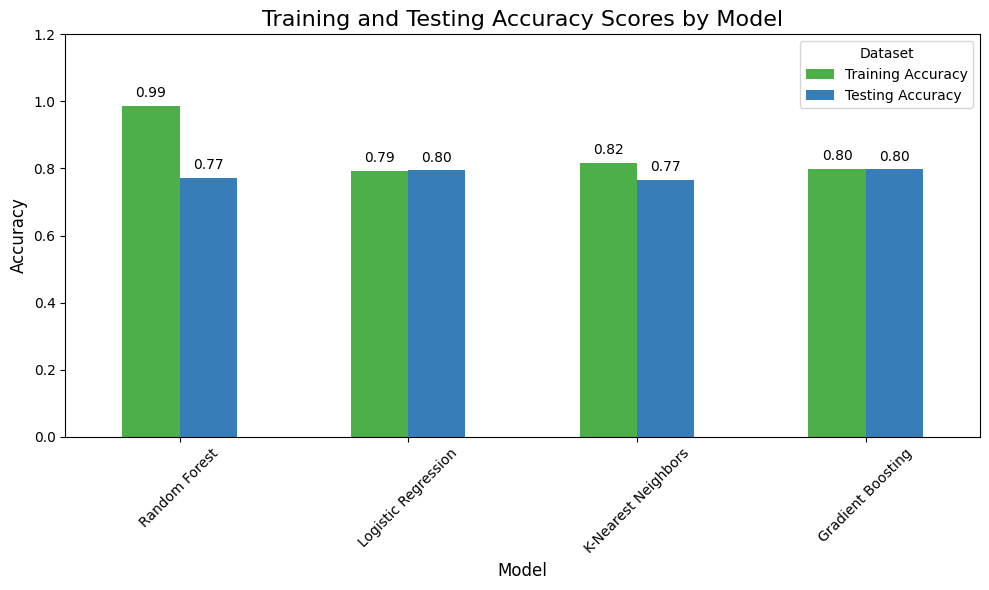

In [7]:
#Model Training, Evaluation, and Overfitting/Underfitting Analysis with Visualization

# Dictionary to Hold Accuracy Scores for Training and Testing Sets
accuracy_scores = {
    'Model': [],
    'Training Accuracy': [],
    'Testing Accuracy': []
}

# Loop Through Each Classifier and Train the Model
for name, model in classifiers.items():
    # Train the classifier on the training set
    model.fit(X_train, y_train)

    # Predict on Training Set and Evaluate Accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Predict on Testing Set and Evaluate Accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Save Training and Testing Accuracies in the Dictionary
    accuracy_scores['Model'].append(name)
    accuracy_scores['Training Accuracy'].append(train_accuracy)
    accuracy_scores['Testing Accuracy'].append(test_accuracy)

# Convert Accuracy Scores Dictionary to DataFrame for Display
accuracy_df = pd.DataFrame(accuracy_scores)

# Display the DataFrame in a Neat Table Format
from tabulate import tabulate
print("Training and Testing Accuracy Scores for Each Model:")
print(tabulate(accuracy_df, headers='keys', tablefmt='pretty'))

# Check for Overfitting or Underfitting
print("\nOverfitting/Underfitting Analysis:")
for index, row in accuracy_df.iterrows():
    model_name = row['Model']
    train_acc = row['Training Accuracy']
    test_acc = row['Testing Accuracy']

    if train_acc > test_acc + 0.1:
        print(f"{model_name}: Overfitting detected.")
    elif test_acc > train_acc + 0.1:
        print(f"{model_name}: Underfitting detected.")
    else:
        print(f"{model_name}: Good balance between training and testing accuracy.")

# Plotting the Training and Testing Accuracy for Each Model
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for training and testing accuracy scores
bars = accuracy_df.plot(x='Model', y=['Training Accuracy', 'Testing Accuracy'], kind='bar', ax=ax, color=['#4daf4a', '#377eb8'])

# Customize the plot
plt.title("Training and Testing Accuracy Scores by Model", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1.2)  # Set y-axis limits

# Add value labels on bars for both Training and Testing Accuracy
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10, color='black')

# Display the plot
plt.legend(title="Dataset", fontsize=10)
plt.tight_layout()
plt.show()


# Hypertuning

Optimizing Random Forest with RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
Training Accuracy: 0.80
Testing Accuracy: 0.80
--------------------------------------------------
Optimizing Logistic Regression with RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}
Training Accuracy: 0.80
Testing Accuracy: 0.80
--------------------------------------------------
Optimizing K-Nearest Neighbors with RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for K-Nearest Neighbors: {'weights': 'uniform', 'p': 1, 'n_neighbors': 11}
Training Accuracy: 0.80
Testing Accuracy: 0.79
--------------------------------------------------
Optimizing Gradient Boosti

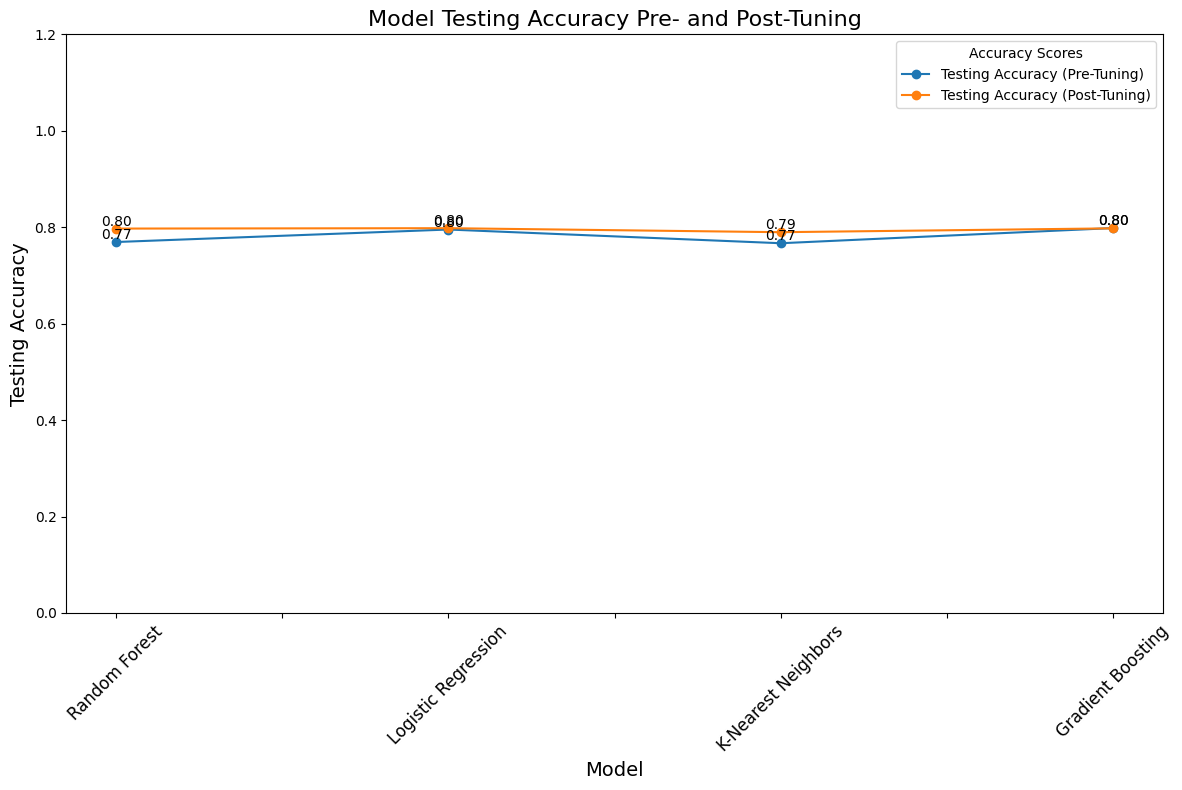

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd

# Define parameter grids for each model
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    'Logistic Regression': {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    }
}

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store accuracy scores pre- and post-tuning
accuracy_scores = {
    'Model': [],
    'Training Accuracy (Pre-Tuning)': [],
    'Testing Accuracy (Pre-Tuning)': [],
    'Training Accuracy (Post-Tuning)': [],
    'Testing Accuracy (Post-Tuning)': []
}

# Loop through each model for pre-tuning evaluation
for name, model in models.items():
    # Train and evaluate each model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    accuracy_scores['Model'].append(name)
    accuracy_scores['Training Accuracy (Pre-Tuning)'].append(accuracy_score(y_train, y_train_pred))
    accuracy_scores['Testing Accuracy (Pre-Tuning)'].append(accuracy_score(y_test, y_test_pred))

# Hyperparameter tuning with RandomizedSearchCV
best_models = {}
for model_name, model in models.items():
    print(f"Optimizing {model_name} with RandomizedSearchCV...")

    # Define RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=10,
        scoring='accuracy',
        cv=3,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    # Fit and retrieve best model
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    best_models[model_name] = best_model  # Save the best model

    # Train best model and evaluate accuracy post-tuning
    best_model.fit(X_train, y_train)
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    accuracy_scores['Training Accuracy (Post-Tuning)'].append(accuracy_score(y_train, y_train_pred))
    accuracy_scores['Testing Accuracy (Post-Tuning)'].append(accuracy_score(y_test, y_test_pred))

    print(f"Best Parameters for {model_name}: {random_search.best_params_}")
    print(f"Training Accuracy: {accuracy_scores['Training Accuracy (Post-Tuning)'][-1]:.2f}")
    print(f"Testing Accuracy: {accuracy_scores['Testing Accuracy (Post-Tuning)'][-1]:.2f}")
    print("-" * 50)

# Convert accuracy scores dictionary to DataFrame for display
accuracy_df = pd.DataFrame(accuracy_scores)

# Display the table of pre- and post-tuning results
print("\nTraining and Testing Accuracy Scores Pre- and Post-Tuning for Each Model:")
print(tabulate(accuracy_df, headers='keys', tablefmt='pretty'))

# Plot accuracy improvements for each model pre- and post-tuning
fig, ax = plt.subplots(figsize=(12, 8))

# Line plot for pre- and post-tuning testing accuracy
accuracy_df.set_index('Model')[['Testing Accuracy (Pre-Tuning)', 'Testing Accuracy (Post-Tuning)']].plot(kind='line', marker='o', ax=ax)
plt.title("Model Testing Accuracy Pre- and Post-Tuning", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Testing Accuracy", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 1.2)  # Set y-axis limits

# Adding value labels on each point for better visibility
for i, model in enumerate(accuracy_df['Model']):
    plt.text(i, accuracy_df['Testing Accuracy (Pre-Tuning)'][i], f"{accuracy_df['Testing Accuracy (Pre-Tuning)'][i]:.2f}", ha='center', va='bottom')
    plt.text(i, accuracy_df['Testing Accuracy (Post-Tuning)'][i], f"{accuracy_df['Testing Accuracy (Post-Tuning)'][i]:.2f}", ha='center', va='bottom')

# Display the plot
plt.legend(title="Accuracy Scores", fontsize=10)
plt.tight_layout()
plt.show()


#Performing Cross-Validation to Evaluate Model Consistency and Generalization


In [11]:
#Performing Cross-Validation to Evaluate Model Consistency and Generalization

# Performing Cross-Validation to Evaluate Model Consistency and Generalization
from sklearn.model_selection import cross_val_score
import pandas as pd

# Dictionary to hold cross-validation scores for each model
cv_scores = {
    'Model': [],
    'Cross-Validation Mean Accuracy': [],
    'Cross-Validation Std Dev': []
}

# Number of folds for cross-validation
cv_folds = 5

# Loop through each classifier and perform cross-validation
for name, model in classifiers.items():
    # Perform cross-validation and get accuracy scores for each fold
    scores = cross_val_score(model, X, y, cv=cv_folds, scoring='accuracy')

    # Calculate mean and standard deviation of the accuracy scores
    mean_accuracy = scores.mean()
    std_dev_accuracy = scores.std()

    # Save the results in the dictionary
    cv_scores['Model'].append(name)
    cv_scores['Cross-Validation Mean Accuracy'].append(mean_accuracy)
    cv_scores['Cross-Validation Std Dev'].append(std_dev_accuracy)

    # Print cross-validation results for each model
    print(f"{name} Cross-Validation Results:")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")
    print(f"Standard Deviation: {std_dev_accuracy:.2f}")
    print("-" * 30)

# Convert the cross-validation scores dictionary to a DataFrame for better readability
cv_scores_df = pd.DataFrame(cv_scores)

# Display the cross-validation results
print("\nCross-Validation Results Summary:")
print(cv_scores_df)

# Identify and print the model with the best cross-validation mean accuracy
best_model = cv_scores_df.loc[cv_scores_df['Cross-Validation Mean Accuracy'].idxmax()]
print("\nBest Cross-Validation Score:")
print(f"Model: {best_model['Model']}")
print(f"Mean Accuracy: {best_model['Cross-Validation Mean Accuracy']:.2f}")
print(f"Standard Deviation: {best_model['Cross-Validation Std Dev']:.2f}")


Random Forest Cross-Validation Results:
Mean Accuracy: 0.77
Standard Deviation: 0.00
------------------------------
Logistic Regression Cross-Validation Results:
Mean Accuracy: 0.79
Standard Deviation: 0.00
------------------------------
K-Nearest Neighbors Cross-Validation Results:
Mean Accuracy: 0.76
Standard Deviation: 0.00
------------------------------
Gradient Boosting Cross-Validation Results:
Mean Accuracy: 0.80
Standard Deviation: 0.00
------------------------------

Cross-Validation Results Summary:
                 Model  Cross-Validation Mean Accuracy  \
0        Random Forest                        0.766968   
1  Logistic Regression                        0.793976   
2  K-Nearest Neighbors                        0.764588   
3    Gradient Boosting                        0.796959   

   Cross-Validation Std Dev  
0                  0.002242  
1                  0.001025  
2                  0.002617  
3                  0.000876  

Best Cross-Validation Score:
Model: Gradien

# Model Optimization with RandomizedSearchCV

In [13]:
# Model Optimization with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

# Reduced parameter grids for faster optimization
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [5, 10],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [1, 2]
    },
    'Logistic Regression': {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1],
        'solver': ['liblinear']  # Reduced solver options for faster performance
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Dictionary to store best models and their scores
best_models = {}
best_scores = {}

# Loop through each model and perform RandomizedSearchCV
for model_name, model in models.items():
    print(f"Optimizing {model_name} with RandomizedSearchCV...")

    # Define RandomizedSearchCV with reduced number of combinations
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=10,  # Limit to 10 random combinations
        scoring='accuracy',
        cv=3,  # Reduced to 3-fold cross-validation for faster performance
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    # Fit RandomizedSearchCV
    random_search.fit(X_train, y_train)

    # Store the best model and score
    best_models[model_name] = random_search.best_estimator_
    best_scores[model_name] = random_search.best_score_

    print(f"Best Parameters for {model_name}: {random_search.best_params_}")
    print(f"Best Cross-Validation Accuracy for {model_name}: {random_search.best_score_:.2f}")
    print("-" * 50)

# Convert the best scores to a DataFrame for a summary view
best_scores_df = pd.DataFrame(list(best_scores.items()), columns=['Model', 'Best Cross-Validation Accuracy'])
print("\nBest Model Cross-Validation Scores:")
print(best_scores_df)

# Identify the best model based on cross-validation accuracy
best_model_name = best_scores_df.loc[best_scores_df['Best Cross-Validation Accuracy'].idxmax(), 'Model']
best_model_accuracy = best_scores_df['Best Cross-Validation Accuracy'].max()
print(f"\nThe best model after tuning is {best_model_name} with a cross-validation accuracy of {best_model_accuracy:.2f}.")


Optimizing Random Forest with RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
Best Cross-Validation Accuracy for Random Forest: 0.80
--------------------------------------------------
Optimizing Logistic Regression with RandomizedSearchCV...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Best Cross-Validation Accuracy for Logistic Regression: 0.80
--------------------------------------------------
Optimizing K-Nearest Neighbors with RandomizedSearchCV...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for K-Nearest Neighbors: {'weights': 'uniform', 'n_neighbors': 7}
Best Cross-Validation Accuracy for K-Nearest Neighbors: 0.78
--------------------------------------------------
Optimizing Gradient Boost

# Loading into a Pickle file

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
import pickle
import pandas as pd

# Step 1: Train the Gradient Boosting Model
best_gradient_boosting_model = GradientBoostingClassifier(random_state=42)
best_gradient_boosting_model.fit(X_train, y_train)
print("Gradient Boosting model trained successfully.")

# Step 2: Save the Model to a Pickle File
with open('best_gradient_boosting_model.pkl', 'wb') as model_file:
    pickle.dump(best_gradient_boosting_model, model_file)
print("Model saved as 'best_gradient_boosting_model.pkl'")

# Step 3: Load the Model from the Pickle File
with open('best_gradient_boosting_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
print("Model loaded successfully.")

# Confirm the loaded model type
print("Loaded model type:", type(loaded_model))

# Step 4: Prepare Sample Input Data
required_features = X_train.columns  # Ensure it matches training feature names
input_data = pd.DataFrame({
    'age_of_casualty': [30],
    'sex_of_casualty': [1],
    'pedestrian_location': [1],
    'casualty_class': [0],
    # Fill in other features as necessary
}).reindex(columns=required_features, fill_value=0)

# Display input data to confirm it matches the expected format
print("Input data (after matching columns):\n", input_data)

# Step 5: Predict Using the Loaded Model
try:
    prediction = loaded_model.predict(input_data)
    severity_mapping = {1: "Fatal", 2: "Serious", 3: "Slight"}
    predicted_severity = severity_mapping.get(prediction[0], "Unknown")
    print(f"Predicted Severity: {predicted_severity}")
except Exception as e:
    print("Error during prediction:", e)

Gradient Boosting model trained successfully.
Model saved as 'best_gradient_boosting_model.pkl'
Model loaded successfully.
Loaded model type: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Input data (after matching columns):
    casualty_class  sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0               0                1               30                     0   

   pedestrian_location  pedestrian_movement  car_passenger  \
0                    1                    0              0   

   bus_or_coach_passenger  pedestrian_road_maintenance_worker  casualty_type  \
0                       0                                   0              0   

   casualty_home_area_type  casualty_imd_decile  lsoa_of_casualty  
0                        0                    0                 0  
Predicted Severity: Slight


In [15]:
 #Save the Trained Model
 import joblib

# Save the best model (for example, the best model from GridSearchCV)
joblib.dump(best_models['Gradient Boosting'], 'best_Gradient_Boosting_model.pkl')


['best_Gradient_Boosting_model.pkl']

In [16]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.5.2


In [17]:
import joblib
print("joblib version:", joblib.__version__)

import pandas as pd
print("pandas version:", pd.__version__)


joblib version: 1.4.2
pandas version: 2.2.2
